<a href="https://colab.research.google.com/github/A-Marambe/Raster_tools/blob/master/Generate_custom_rasters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This code open, converts images into arrays and create new arrays/images based on condionals apply accross 2 or more images. This code has potential applications in curve number in basin analysis or creating custom value raster using raster values of other images.

#### **Note: install rasterio if use google colab to run in cloud.** 

In [0]:
# import modules
import os
import numpy as np
import pandas as pd

# imports for rasters
from osgeo import gdal,osr
import rasterio as ras

# imports for display
from matplotlib import pyplot as plt


%matplotlib inline

In [0]:
# functionality to open image, selecting the band and converting to a numpy array
def image_to_array(image_path):
    image_file = ras.open(image_path) # use gdal for faster operations
    image_band = image_file.read(1)
    im_band = np.uint8(image_band)
    return im_band

# image display functions
def display_image (array_name):
    fig, ax = plt.subplots(figsize=(6,8))
    plt.imshow(array_name, cmap="Spectral")


**mount google drive for file I/O : this is the convinient way of file management in google colab, while there are other options are always there.**

In [0]:
## uncoment and run this snippet to mount google drive if data I/O with Gdrive
#from google.colab import drive
#osdrive.mount('/content/drive')

Take input data from google drive

In [11]:
# change directory to data folder
os.chdir("/content/drive/My Drive/colab_data")

# create first array using the function :: convervt to float type 
im_array_1 = image_to_array("./custom_raster_input/soil.tif").astype(float) # here using a soil class image
im_array_2 = image_to_array("./custom_raster_input/LC2.tif").astype(float)  # here using a land cover class image
print(im_array_1)

[[127. 127. 127. ... 127. 127. 127.]
 [127. 127. 127. ... 127. 127. 127.]
 [127. 127. 127. ... 127. 127. 127.]
 ...
 [127. 127. 127. ... 127. 127. 127.]
 [127. 127. 127. ... 127. 127. 127.]
 [127. 127. 127. ... 127. 127. 127.]]


image 1 dimentions are (9845, 9292)
image 2 dimentions are (9845, 9292)




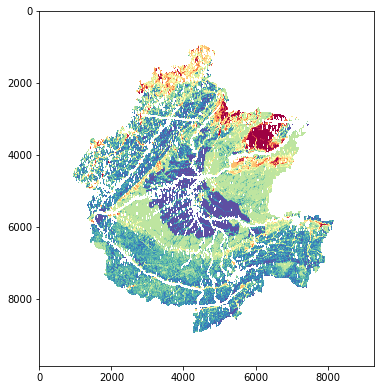

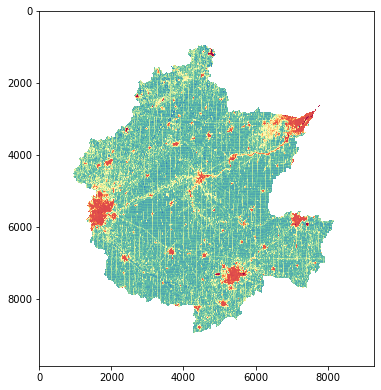

In [20]:
# here 127 and 255 are no data values:: to clear up the background in presentation make it nan
im_array_1[im_array_1==127] = np.nan
im_array_2[im_array_2==255] = np.nan

# plot images
display_image(im_array_1)
display_image(im_array_2)

# print array dimentions before operations
# warning:: image dimentions should be same for further operations
print("image 1 dimentions are {}".format(np.shape(im_array_1)))
print("image 2 dimentions are {}".format(np.shape(im_array_2)))
print("\n")

**Create an empty array with the same dimentions of other images and apply conditionals based on the scinario**

In [0]:
# creating an zero value array with the shape of other image arrays
new_array = np.zeros(shape=(9845, 9292))
#new_array_int = new_array.astype(int)
#new_array_int

In [43]:
new_array_c1 = np.where((im_array_2==82) & (im_array_1==3), new_array+12, new_array)
new_array_c2 = np.where((im_array_2==81) & (im_array_1==3), new_array_c1+10, new_array_c1)
new_array_c2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

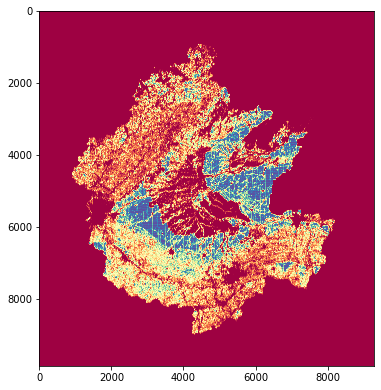

In [44]:
# plot images
display_image(new_array_c2)

**saving the array as a Geotiff**

> collecting CRS informations from a image to transfer to new image

In [49]:
# see metadat profile of CRS source image
profile_image = ras.open("./custom_raster_input/soil.tif")
# see meta data
image_meta = profile_image.profile
print(image_meta)

#image_transform = image_meta["transform"]
#image_crs = image_meta["crs"]
#image_transform, image_crs

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 127.0, 'width': 9292, 'height': 9845, 'count': 1, 'crs': CRS.from_epsg(3857), 'transform': Affine(29.998005574687777, 0.0, -9526144.1683,
       0.0, -29.998005576434682, 5192638.1943), 'tiled': False, 'interleave': 'band'}


(Affine(29.998005574687777, 0.0, -9526144.1683,
       0.0, -29.998005576434682, 5192638.1943),
 CRS.from_epsg(3857))

In [0]:
# cast array to unint8 before writing to image
out_image = np.uint8(new_array_c2)

# write array raster object
with ras.open('./custom_raster_output/custom_image.tif', 'w', **image_meta ) as dst:
    dst.write(out_image, 1)